# **Credit Card Fraud Detection using <span style="color: #40E0D0;">QML Model</span>**


It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

We will be using <a href="https://qiskit.org/documentation/stable/0.19/index.html" style="color: #40E0D0;">Qiskit</a> library to create quantum circuits (VQC) and <a href="https://scikit-learn.org/stable/" style="color: #40E0D0;">scikit-learn</a> library to run classical models.

Credit card fraud detection is a crucial use case in the financial industry. The dataset used is provided by <a href="https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud" style="color: #40E0D0;">Kaggle</a>.

This project comprises of developing a QML (Quantum Machine Learning) model to identify fraudulent transactions from credit card transaction data

### <span style="color: #40E0D0;">**Steps**</span>

*   Data Loading
*   Data Preprocessing
*   Building a Quantum Model
*   Running Classical Machine Learning Models

## Installing Required Libraries
Installing libraries used throughout the program using PIP

In [1]:
!pip install numpy pandas matplotlib scikit-learn qiskit qiskit-machine-learning qiskit_algorithms

## **Importing Modules**
Installing modules used throughout the program

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time, copy, warnings

# Classical models
from sklearn import linear_model, svm
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Analysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Feature Analysis
from qiskit.circuit.library import PauliFeatureMap, ZFeatureMap, ZZFeatureMap
from qiskit_machine_learning.circuit.library import RawFeatureVector
from qiskit.circuit.library import RealAmplitudes

from qiskit_algorithms.optimizers import COBYLA

# This defines where to train our classifier: on a simulator or a real quantum computer
from qiskit.primitives import Sampler                             # here we have chosen a simulator 

from qiskit_machine_learning.algorithms.classifiers import VQC

from IPython.display import clear_output

## **Data Loading**

Using dataset provided by <a href="https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud" style="color: #40E0D0;">Kaggle</a>

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


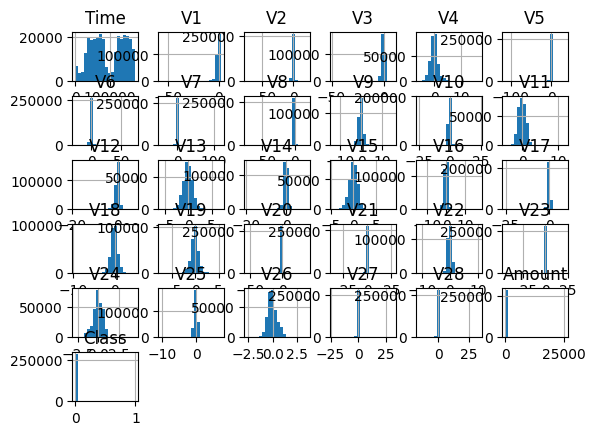

In [3]:
dataset_path = "creditcard.csv"

data = pd.read_csv(dataset_path)   
histogram = data.hist(bins=20)

data

### <span style="color: #40E0D0;">Visualizing Loaded Data</span>

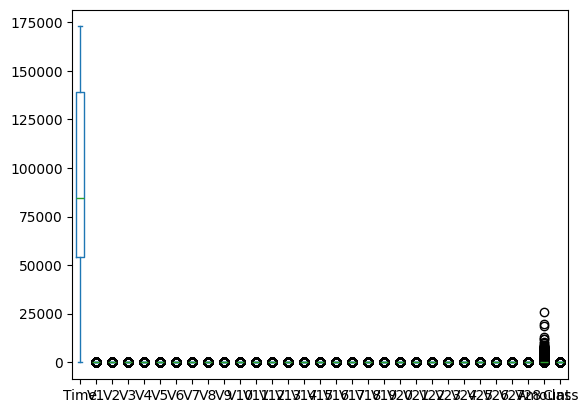

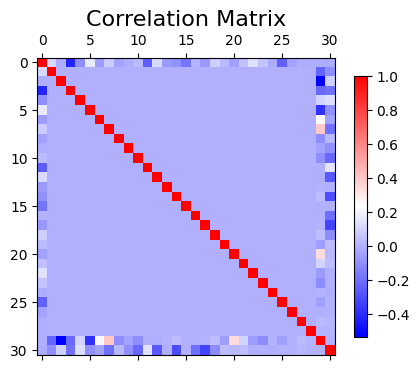

In [4]:
# 'Time' and 'Amount' are bigger than other features V1, ..., V28 values
data.plot.box()


# features V1, ..., V28 are not correlated as they are the principal components obtained with PCA
plt.matshow(data.corr(), cmap='bwr')
cb = plt.colorbar(shrink=0.7)
plt.title('Correlation Matrix', fontsize=16) 
plt.show()

## **Data Preprocessing**

The dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. </br>
The dataset is highly imbalanced, the positive class (fraud) accounts for 0.172% of all transactions.</br>
The model tends to be biased toward the majority (normal) class in case of the imbalanced data, leading to poor performance on the minority (fraud) class. </br>
Here are some strategies to address the issue of imbalanced data:

- __Resampling Techniques:__</br>
a. _Undersampling_: Randomly draw a subsample from the majority class to balance the dataset. </br>
    However, undersampling may lead to loss of information and can be problematic if the dataset is already small. </br>
b. _Oversampling_: Duplicating or creating synthetic samples for the minority class to increase its representation. </br>
    Techniques like SMOTE (Synthetic Minority Over-sampling Technique) generate synthetic samples by interpolating between existing samples.

- __Class Weighting:__</br>
Assigning higher weights to the minority class during model training to make it more influential. </br>
This ensures that the model pays more attention to the minority class and adjusts its decision boundary accordingly.

Choosing to apply an <span style="color: #40E0D0;">undersampling</span> technique...

### <span style="color: #40E0D0;">1. Separating Normal and Fraud Cases</span>

In [5]:
normal = data[data.Class==0] # Set of all normal (y = 0) cases
fraud = data[data.Class==1]  # Set of all fraud (y = 1) cases


num_normal = normal.shape[0] 
num_fraud = fraud.shape[0] 

print(f"Number of normal examples = {num_normal}")
print(f"Number of fraud examples = {num_fraud}\n")


ratio = num_normal/num_fraud
print(f'normal to fraud ratio in the whole data = {round(ratio,2)}')

Number of normal examples = 284315
Number of fraud examples = 492

normal to fraud ratio in the whole data = 577.88


### <span style="color: #40E0D0;">2. Sample Building by Choosing a Normal Fraud Ratio</span>

In [8]:
# A choice of normal_fraud_ratio has effects on precision and recall given below.

normal_fraud_ratio = 1                                      # normal_fraud_ratio = 1 means balance sample
normal_sample = normal.sample(normal_fraud_ratio*num_fraud) 

# Joining row-wise (axis=0) normal and fraud cases to get a sample 
sample = pd.concat([fraud, normal_sample], axis=0)  

for i in range(100):
    sample = np.random.permutation(sample)                   # Random shuffling of sample examples 100 times
    
X, y = sample[:, :-1], sample[:, -1]

X = MinMaxScaler().fit_transform(X)            # This will put all the feature (X) values in the interval [0,1]

num_examples, num_features = X.shape   
print("number of examples = ", num_examples)
print("number of features = ", num_features)

X[:3,:], y[:3]                                 # Refer first 3 examples

number of examples =  984
number of features =  30


(array([[5.42791262e-01, 6.00242095e-01, 7.23637823e-01, 4.17848227e-01,
         7.80054731e-01, 2.15439521e-01, 5.89854497e-01, 5.97250559e-01,
         7.89703334e-01, 5.13993813e-01, 2.98505910e-01, 7.26084073e-01,
         1.15767014e-01, 5.35659067e-01, 1.79933128e-01, 5.94792535e-01,
         1.31047369e-01, 3.03296148e-01, 2.82194057e-01, 8.76736238e-01,
         4.13061186e-01, 5.06780326e-01, 5.23076749e-01, 7.37457506e-01,
         7.08982392e-01, 6.99331600e-01, 3.23037665e-01, 4.95054704e-01,
         4.22811686e-01, 2.55679863e-02],
        [8.57550255e-01, 9.69233027e-01, 6.51516910e-01, 7.47788517e-01,
         5.96228049e-01, 4.28096360e-01, 6.81292921e-01, 8.64236847e-01,
         6.74305195e-01, 5.63266961e-01, 6.82883008e-01, 3.11292547e-01,
         6.48569260e-01, 5.83998876e-01, 4.53006829e-01, 5.17446188e-01,
         7.79623748e-01, 7.45722304e-01, 7.06929719e-01, 2.48589451e-01,
         4.61203830e-01, 4.60129724e-01, 4.90525734e-01, 7.72631768e-01,
         

In [ ]:
''' 
Zero padding is to make the number of features equal to a power of 2.
It is required for 'amplitude encoding' given below.
'''

n = int(np.ceil(np.log2(num_features)))
dim = 2**n
print(f'(number of qubits, dimension of the Hilbert space) = {(n, dim)}')

zeros = np.zeros((num_examples, dim-num_features))
X = np.append(X, zeros, axis=1)
num_examples, num_features = X.shape

num_examples, num_features = X.shape   
print("number of examples = ", num_examples)
print("number of features = ", num_features)

NameError: name 'np' is not defined

### <span style="color: #40E0D0;">3. Train-Test Split</span>

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape, X_test.shape)

(688, 32) (296, 32)


## **Quantum Machine Learning**

Use either angle or amplitude feature encoding </br>
__When the number of features is large (say, more than 6), use amplitude encoding__

### <span style="color: #40E0D0;">1a. Feature Map (FM): Angle Encoding</span>

In [ ]:
fm = ZZFeatureMap(feature_dimension=num_features, reps=1)                   # ZZFeatureMap is more suited
fm.decompose().draw() 

### <span style="color: #40E0D0;">1b. Feature Map (FM): Amplitude Encoding</span>

__Zero padding given above is needed for this encoding__

In [ ]:
fm = RawFeatureVector(feature_dimension=num_features) 
fm.draw()

### <span style="color: #40E0D0;">2. Parameterized Quantum Circuit (PQC)</span>

In [13]:
'''
For angle encoding, num_qubits = num_features
For amplitude encoding, num_qubits = n = np.log2(num_features)
'''

pqc = RealAmplitudes(num_qubits=n, reps=3)
pqc.decompose().draw()

┌──────────┐                                          ┌──────────┐»
q_0: ┤ Ry(θ[0]) ├──────────────────────────────────■───────┤ Ry(θ[5]) ├»
     ├──────────┤                                ┌─┴─┐     ├──────────┤»
q_1: ┤ Ry(θ[1]) ├──────────────────────■─────────┤ X ├─────┤ Ry(θ[6]) ├»
     ├──────────┤                    ┌─┴─┐    ┌──┴───┴───┐ └──────────┘»
q_2: ┤ Ry(θ[2]) ├──────────■─────────┤ X ├────┤ Ry(θ[7]) ├──────■──────»
     ├──────────┤        ┌─┴─┐    ┌──┴───┴───┐└──────────┘    ┌─┴─┐    »
q_3: ┤ Ry(θ[3]) ├──■─────┤ X ├────┤ Ry(θ[8]) ├─────■──────────┤ X ├────»
     ├──────────┤┌─┴─┐┌──┴───┴───┐└──────────┘   ┌─┴─┐    ┌───┴───┴───┐»
q_4: ┤ Ry(θ[4]) ├┤ X ├┤ Ry(θ[9]) ├───────────────┤ X ├────┤ Ry(θ[14]) ├»
     └──────────┘└───┘└──────────┘               └───┘    └───────────┘»
«                               ┌───────────┐                          »
«q_0: ───────────────────■──────┤ Ry(θ[10]) ├───────────────────■──────»
«                      ┌─┴─┐    ├───────────┤                 ┌─┴─┐    »
«q_1: ──────■──────────┤ X ├────┤ Ry(θ[11]) ├──────■──────────┤ X ├────»
«         ┌─┴─┐    ┌───┴───┴───┐└───────────┘    ┌─┴─┐    ┌───┴───┴───┐»
«q_2: ────┤ X ├────┤ Ry(θ[12]) ├──────■──────────┤ X ├────┤ Ry(θ[17]) ├»
«     ┌───┴───┴───┐└───────────┘    ┌─┴─┐    ┌───┴───┴───┐└───────────┘»
«q_3: ┤ Ry(θ[13]) ├──────■──────────┤ X ├────┤ Ry(θ[18]) ├─────────────»
«     └───────────┘    ┌─┴─┐    ┌───┴───┴───┐└───────────┘             »
«q_4: ─────────────────┤ X ├────┤ Ry(θ[19]) ├──────────────────────────»
«                      └───┘    └───────────┘                          »
«     ┌───────────┐
«q_0: ┤ Ry(θ[15]) ├
«     ├───────────┤
«q_1: ┤ Ry(θ[16]) ├
«     └───────────┘
«q_2: ─────────────
«                  
«q_3: ─────────────
«                  
«q_4: ─────────────
«

### <span style="color: #40E0D0;">3. Build the Model: [Variational Quantum Classifier (VQC)](https://qiskit.org/documentation/stable/0.19/stubs/qiskit.aqua.algorithms.VQC.html#qiskit.aqua.algorithms.VQC) with FM and PQC</span>


<a href="https://qiskit.org/documentation/apidoc/primitives.html" style="color: #40E0D0;">Sampler</a> class calculates probabilities or quasi-probabilities of bitstrings from quantum circuits.</br>
A sampler is initialized with an empty parameter set.</br> The sampler is used to create a JobV1, via the qiskit.primitives.Sampler.run() method, </br>and yields a SamplerResult object, which contains probabilities or quasi-probabilities of bitstrings, plus optional metadata like error bars in the samples.


In [14]:
# A callback that can access the intermediate data during the optimization
def callback(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

optimizer = COBYLA(maxiter=150)                 # maxiter = Maximum number of iterations (function evaluations)
sampler = Sampler()

objective_func_vals = []

vqc = VQC(
    sampler=sampler,
    feature_map=fm,
    ansatz=pqc,
    optimizer=optimizer,
    callback=callback,
)

C:\Users\omtan\AppData\Local\Temp\ipykernel_4760\3091302636.py:11: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


### <span style="color: #40E0D0;">4. Training VQC</span>

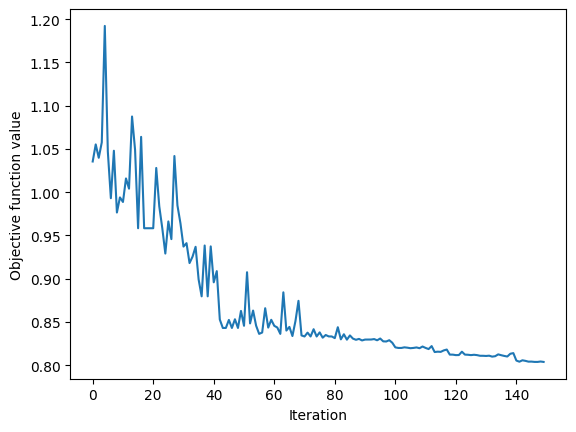

CPU times: total: 8min 23s
Wall time: 8min 56s


In [15]:
%%time

'''Training time seems to increase with the number of features'''

vqc.fit(X_train, y_train)

### <span style="color: #40E0D0;">5. Performance Evaluation of Trained VQC</span>

In imbalanced datasets, accuracy alone is not a reliable performance metric. It can be misleading due to the dominance of the majority class. Instead, focus on evaluation metrics like precision, recall, F1-score, or area under the Receiver Operating Characteristic (ROC) curve, which provide a more comprehensive assessment of the model's performance on both classes.

More Area Under the Receiver Operating Characteristic Curve (__ROC AUC__) better classifier.

Train Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      1.00      0.84       343
         1.0       1.00      0.63      0.77       345

    accuracy                           0.81       688
   macro avg       0.86      0.81      0.81       688
weighted avg       0.86      0.81      0.81       688

Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85       149
         1.0       1.00      0.65      0.79       147

    accuracy                           0.82       296
   macro avg       0.87      0.82      0.82       296
weighted avg       0.87      0.82      0.82       296

Confusion Matrix for Train Set:
 [[343   0]
 [128 217]]
Confusion Matrix for Test Set:
 [[149   0]
 [ 52  95]]
ROC AUC Score for Test Set: 0.82


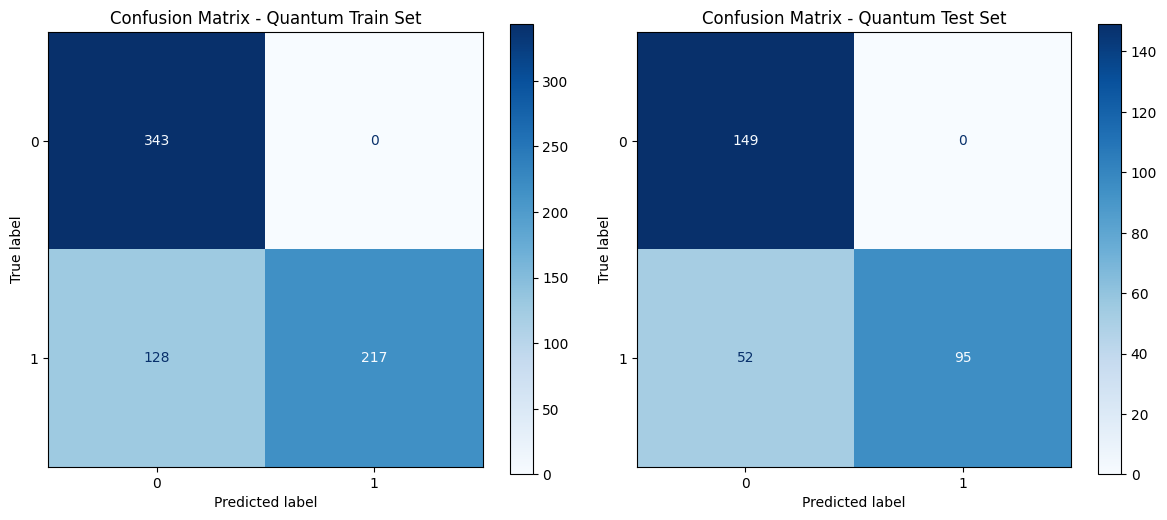

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, roc_auc_score

# Predictions
y_train_pred = vqc.predict(X_train)
y_test_pred = vqc.predict(X_test)

# Classification reports
print("Train Classification Report:")
print(classification_report(y_train, y_train_pred))

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Confusion matrices
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix for Train Set:\n", conf_matrix_train)
print("Confusion Matrix for Test Set:\n", conf_matrix_test)

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_test_pred)
print("ROC AUC Score for Test Set:", round(roc_auc, 2))

# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Train confusion matrix
ConfusionMatrixDisplay(conf_matrix_train).plot(ax=ax[0], cmap='Blues')
ax[0].set_title("Confusion Matrix - Quantum Train Set")

# Test confusion matrix
ConfusionMatrixDisplay(conf_matrix_test).plot(ax=ax[1], cmap='Blues')
ax[1].set_title("Confusion Matrix - Quantum Test Set")

plt.tight_layout()
plt.show()


## **Classical Machine Learning Models**
Run using <span style="color: #40E0D0;">scikit-learn</span> library to run classical models</br>
The evaluation of each model is subsequently displayed

                     LogisticRegression() 

Classification Report for Train Set:
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93       343
         1.0       0.99      0.86      0.92       345

    accuracy                           0.92       688
   macro avg       0.93      0.92      0.92       688
weighted avg       0.93      0.92      0.92       688

Confusion Matrix for Train Set:
[[339   4]
 [ 49 296]]

Classification Report for Test Set:
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       149
         1.0       1.00      0.88      0.94       147

    accuracy                           0.94       296
   macro avg       0.95      0.94      0.94       296
weighted avg       0.95      0.94      0.94       296

Confusion Matrix for Test Set:
[[149   0]
 [ 17 130]]
ROC AUC Score for Test Set: 0.94


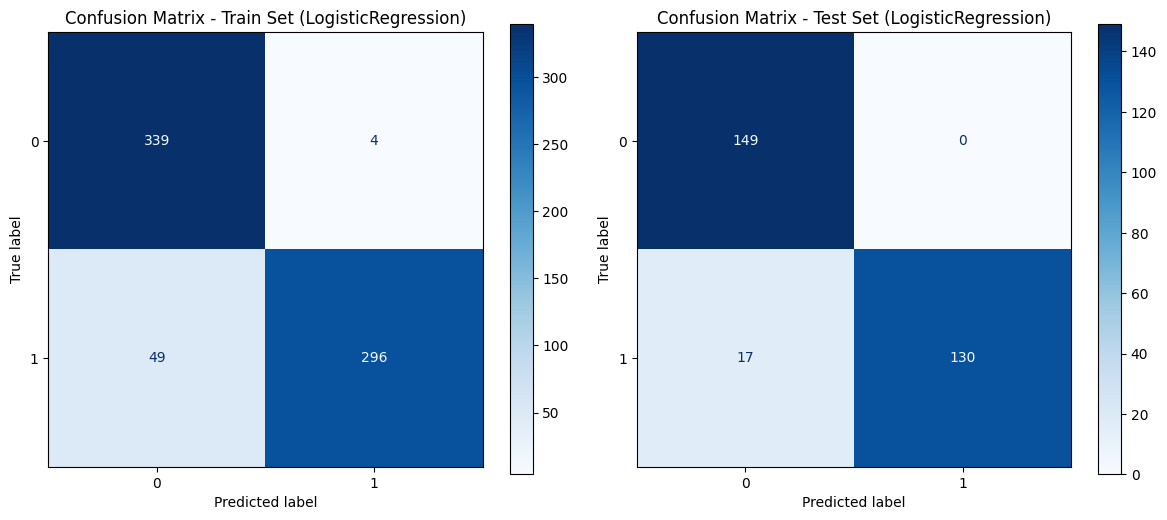

                     MLPClassifier() 

Classification Report for Train Set:
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       343
         1.0       0.98      0.89      0.93       345

    accuracy                           0.93       688
   macro avg       0.94      0.93      0.93       688
weighted avg       0.94      0.93      0.93       688

Confusion Matrix for Train Set:
[[336   7]
 [ 39 306]]

Classification Report for Test Set:
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       149
         1.0       0.98      0.92      0.95       147

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296

Confusion Matrix for Test Set:
[[146   3]
 [ 12 135]]
ROC AUC Score for Test Set: 0.95


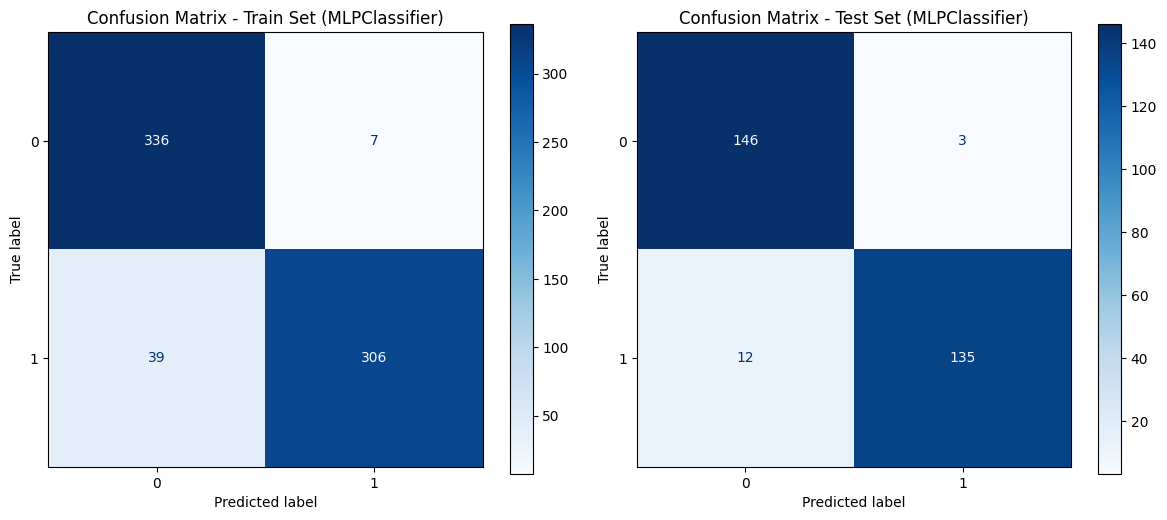

                     SVC() 

Classification Report for Train Set:
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93       343
         1.0       0.99      0.86      0.92       345

    accuracy                           0.92       688
   macro avg       0.93      0.92      0.92       688
weighted avg       0.93      0.92      0.92       688

Confusion Matrix for Train Set:
[[340   3]
 [ 50 295]]

Classification Report for Test Set:
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.95       149
         1.0       0.99      0.89      0.94       147

    accuracy                           0.94       296
   macro avg       0.95      0.94      0.94       296
weighted avg       0.95      0.94      0.94       296

Confusion Matrix for Test Set:
[[148   1]
 [ 16 131]]
ROC AUC Score for Test Set: 0.94


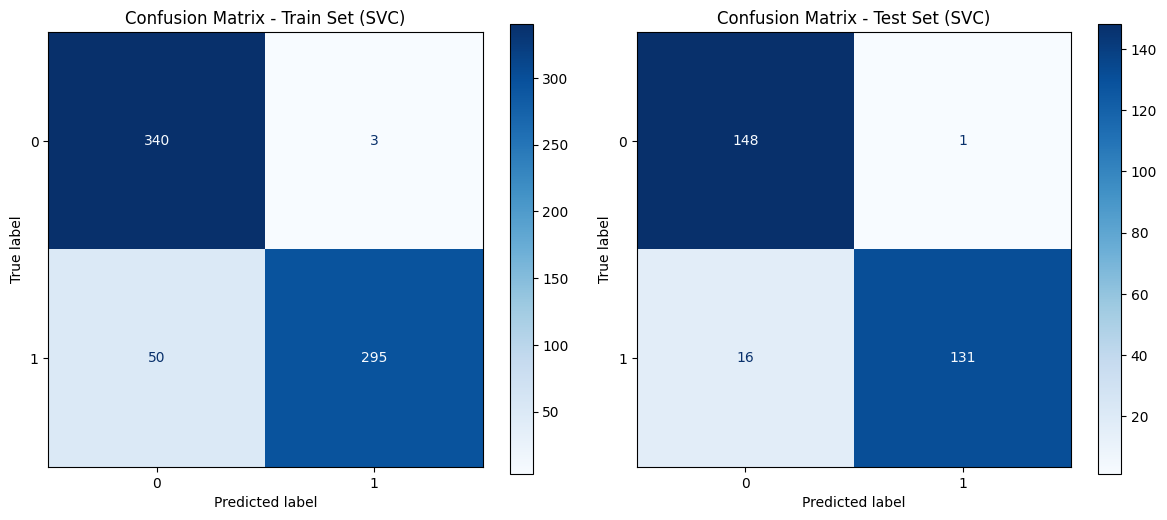

                     RandomForestClassifier() 

Classification Report for Train Set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       343
         1.0       1.00      1.00      1.00       345

    accuracy                           1.00       688
   macro avg       1.00      1.00      1.00       688
weighted avg       1.00      1.00      1.00       688

Confusion Matrix for Train Set:
[[343   0]
 [  0 345]]

Classification Report for Test Set:
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96       149
         1.0       0.98      0.95      0.96       147

    accuracy                           0.96       296
   macro avg       0.96      0.96      0.96       296
weighted avg       0.96      0.96      0.96       296

Confusion Matrix for Test Set:
[[146   3]
 [  8 139]]
ROC AUC Score for Test Set: 0.96


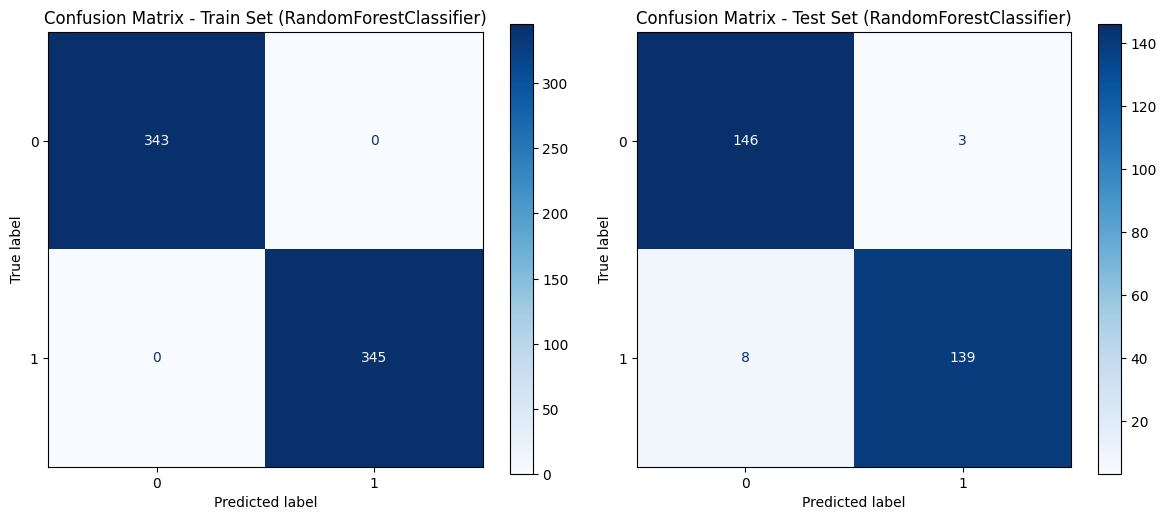

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, roc_auc_score
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import warnings


warnings.filterwarnings('ignore')

# Updated train_test function
def train_test(ML_model):
    print(20 * ' ', ML_model, '\n')
    ML_model.fit(X_train, y_train)  # Fit model
    
    y_train_pred = ML_model.predict(X_train)  # Predict with the trained model
    y_test_pred = ML_model.predict(X_test)
    
    print("Classification Report for Train Set:")
    print(classification_report(y_train, y_train_pred))  # Evaluate model performance
    print("Confusion Matrix for Train Set:")
    print(confusion_matrix(y_train, y_train_pred))
    
    print("\nClassification Report for Test Set:")
    print(classification_report(y_test, y_test_pred))
    print("Confusion Matrix for Test Set:")
    print(confusion_matrix(y_test, y_test_pred))
    
    print("ROC AUC Score for Test Set:", round(roc_auc_score(y_test, y_test_pred), 2))
    print(70 * '=')
    
    # Plot confusion matrices
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # Train confusion matrix
    ConfusionMatrixDisplay(confusion_matrix(y_train, y_train_pred)).plot(ax=ax[0], cmap='Blues')
    ax[0].set_title(f"Confusion Matrix - Train Set ({type(ML_model).__name__})")
    
    # Test confusion matrix
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred)).plot(ax=ax[1], cmap='Blues')
    ax[1].set_title(f"Confusion Matrix - Test Set ({type(ML_model).__name__})")
    
    plt.tight_layout()
    plt.show()

# Main Code
print(70 * '=')
models = [
    linear_model.LogisticRegression(),
    MLPClassifier(),
    svm.SVC(),
    RandomForestClassifier()
]

for ML_model in models:
    train_test(ML_model)
